<a href="https://colab.research.google.com/github/Kamiliaadil/Capstone-Project-Using-Machine-Learning-Methods-to-Predict-Academic-Success-in-College/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The dataset used in this lab is sourced from the UC Machine Learning Repository: https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success. The dataset encompasses information regarding students enrolled in various undergraduate programs such as agronomy, design, education, nursing, journalism, management, social services, and technologies.
The problem is formulated as a three category classification tasks (dropout, enrolled, and graduate) at the end of the normal course duration.  The motivation behind the project is to implement strategies to support students and improve their chances of academic success.

In [ ]:
# Install the pyclustering library for performing clustering
!pip install pyclustering

In [ ]:
# import the necessary librairies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split # Importing train_test_split function for splitting the data
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for feature scaling
from sklearn.neighbors import KNeighborsClassifier # K-nearest neighbors classifier model
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold  #Importing  K-fold cross-validation
from sklearn.model_selection import StratifiedKFold  #Importing Stratified K-fold cross-validation
from sklearn.model_selection import cross_val_score # Importing function for computing cross-validation scores
from sklearn.metrics import classification_report # Importing function for generating classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import pickle


In [ ]:
# I am using the sep parameter in the pd.read function to correctly parse the data
#because the CSV file I am reading uses a semicolon (;) as the delimiter instead of the default comma (,).
df=pd.read_csv('/content/Capston_data.csv', sep=';')

In [ ]:
print(df.shape)
df.head()

(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# the data contains 4424 instances and 37 columns
df.shape

(4424, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
#Since my goal is to predict the students’ dropout and graduation,
#I dropped the “Enroll” class from the target variable.
df.drop(df[df["Target"]=="Enrolled"].index,inplace=True)

In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [ ]:
#df.drop('International', axis=1,inplace=True)

In [ ]:
df.shape

(3630, 37)

In [ ]:
# Replacing "Dropout" with 1 and "Graduate" with 0
df.replace("Dropout",1,inplace=True)
df.replace("Graduate",0,inplace=True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,3630.0,1.184298,0.613009,1.00,1.000000,1.000000,1.00,6.000000
Application mode,3630.0,18.421763,17.358595,1.00,1.000000,17.000000,39.00,57.000000
Application order,3630.0,1.750138,1.333831,0.00,1.000000,1.000000,2.00,6.000000
Course,3630.0,8853.980992,2068.760082,33.00,9085.000000,9254.000000,9556.00,9991.000000
Daytime/evening attendance\t,3630.0,0.887603,0.315897,0.00,1.000000,1.000000,1.00,1.000000
Previous qualification,3630.0,4.532231,10.024134,1.00,1.000000,1.000000,1.00,43.000000
Previous qualification (grade),3630.0,132.920606,13.238373,95.00,125.000000,133.100000,140.00,190.000000
Nacionality,3630.0,1.828099,6.667614,1.00,1.000000,1.000000,1.00,109.000000
Mother's qualification,3630.0,19.986226,15.585278,1.00,2.000000,19.000000,37.00,44.000000
Father's qualification,3630.0,22.571625,15.275453,1.00,3.000000,19.000000,37.00,44.000000


In [ ]:
# Import necessary library
#from tabulate import tabulate

# List of columns to drop
#columns_to_drop = ['Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (without evaluations)', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', 'Educational special needs', 'Curricular units 2nd sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (credited)', 'International', 'Marital status']

# Drop the specified columns from the DataFrame
#key_df = df.drop(columns_to_drop, axis=1)

# Calculate summary statistics with limited decimal places
#summary_stats = key_df.describe().transpose().round(2)

# Print the table
#print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

+----------------------------------------+--------+---------+---------+-------+--------+--------+--------+--------+
|                                        | count  |  mean   |   std   |  min  |  25%   |  50%   |  75%   |  max   |
+----------------------------------------+--------+---------+---------+-------+--------+--------+--------+--------+
|            Application mode            | 3630.0 |  18.42  |  17.36  |  1.0  |  1.0   |  17.0  |  39.0  |  57.0  |
|           Application order            | 3630.0 |  1.75   |  1.33   |  0.0  |  1.0   |  1.0   |  2.0   |  6.0   |
|                 Course                 | 3630.0 | 8853.98 | 2068.76 | 33.0  | 9085.0 | 9254.0 | 9556.0 | 9991.0 |
|     Previous qualification (grade)     | 3630.0 | 132.92  |  13.24  | 95.0  | 125.0  | 133.1  | 140.0  | 190.0  |
|         Mother's qualification         | 3630.0 |  19.99  |  15.59  |  1.0  |  2.0   |  19.0  |  37.0  |  44.0  |
|         Father's qualification         | 3630.0 |  22.57  |  15.28  | 

In [ ]:
df['Target'].value_counts()

Target
0    2209
1    1421
Name: count, dtype: int64

In [ ]:
# Generate the correlation table
correlation_table = df.corr()

# Display the correlation table
print(correlation_table)

                                                Marital status  \
Marital status                                        1.000000   
Application mode                                      0.274985   
Application order                                    -0.130370   
Course                                                0.042012   
Daytime/evening attendance\t                         -0.265823   
Previous qualification                                0.070984   
Previous qualification (grade)                       -0.038869   
Nacionality                                          -0.008899   
Mother's qualification                                0.185117   
Father's qualification                                0.124995   
Mother's occupation                                   0.053892   
Father's occupation                                   0.050499   
Admission grade                                      -0.012440   
Displaced                                            -0.240544   
Educationa

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


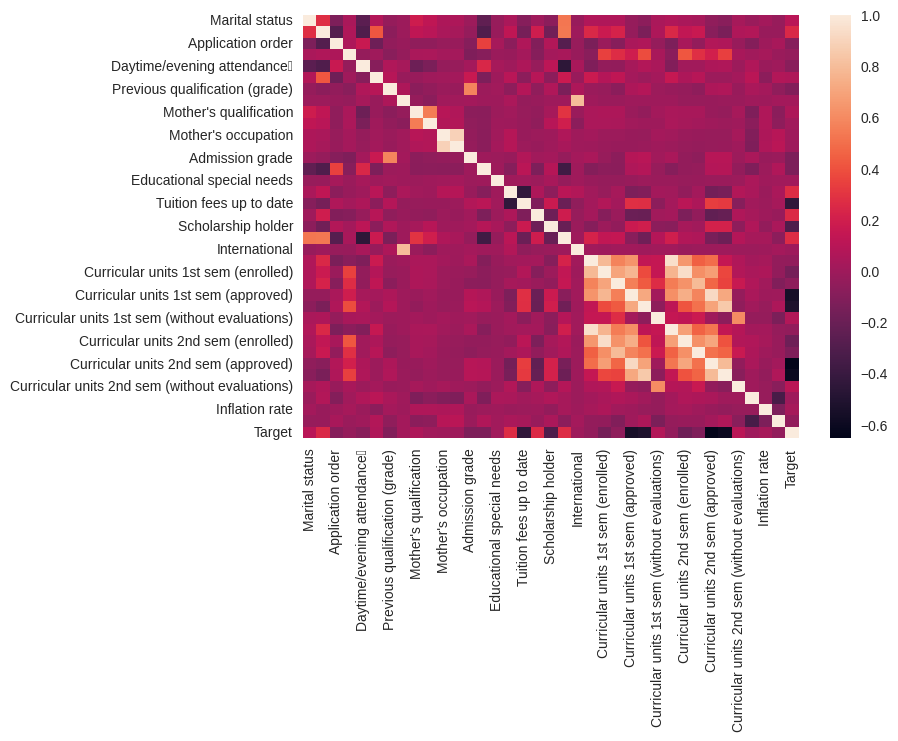

In [ ]:
df.corr()
sb.heatmap(df.corr())
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


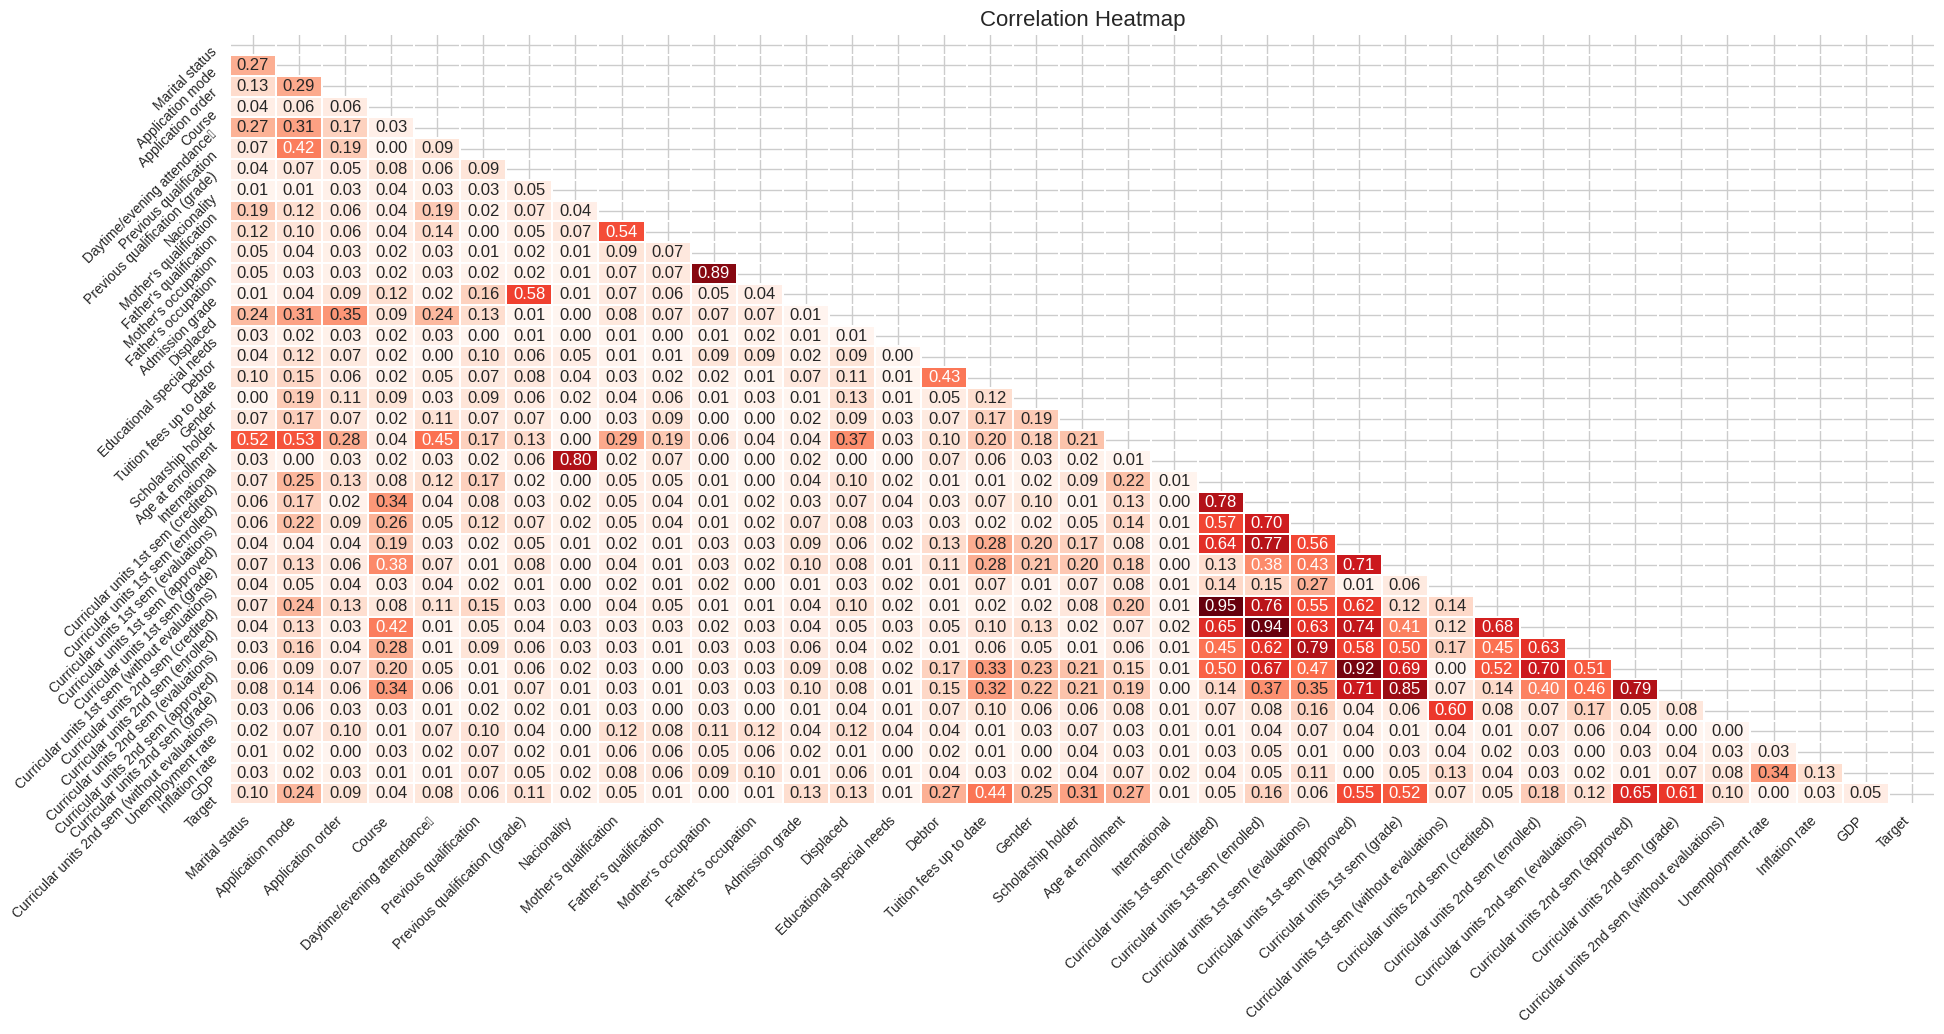

In [ ]:
import numpy as np

# Make a copy of the dataframe
new_df = df.copy()

# Adjust the figure size for better readability
plt.figure(figsize=(22, 10))

# Calculate the correlation matrix
corr = new_df.corr()

# Mask the upper triangular part of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap without gridlines
heatmap = sb.heatmap(abs(corr), annot=True, cmap="Reds", fmt=".2f", mask=mask, cbar=False, linewidths=0.01)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels for better readability
plt.yticks(rotation=45, va='top')

# Add title
plt.title("Correlation Heatmap", fontsize=16)

# Display the heatmap
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


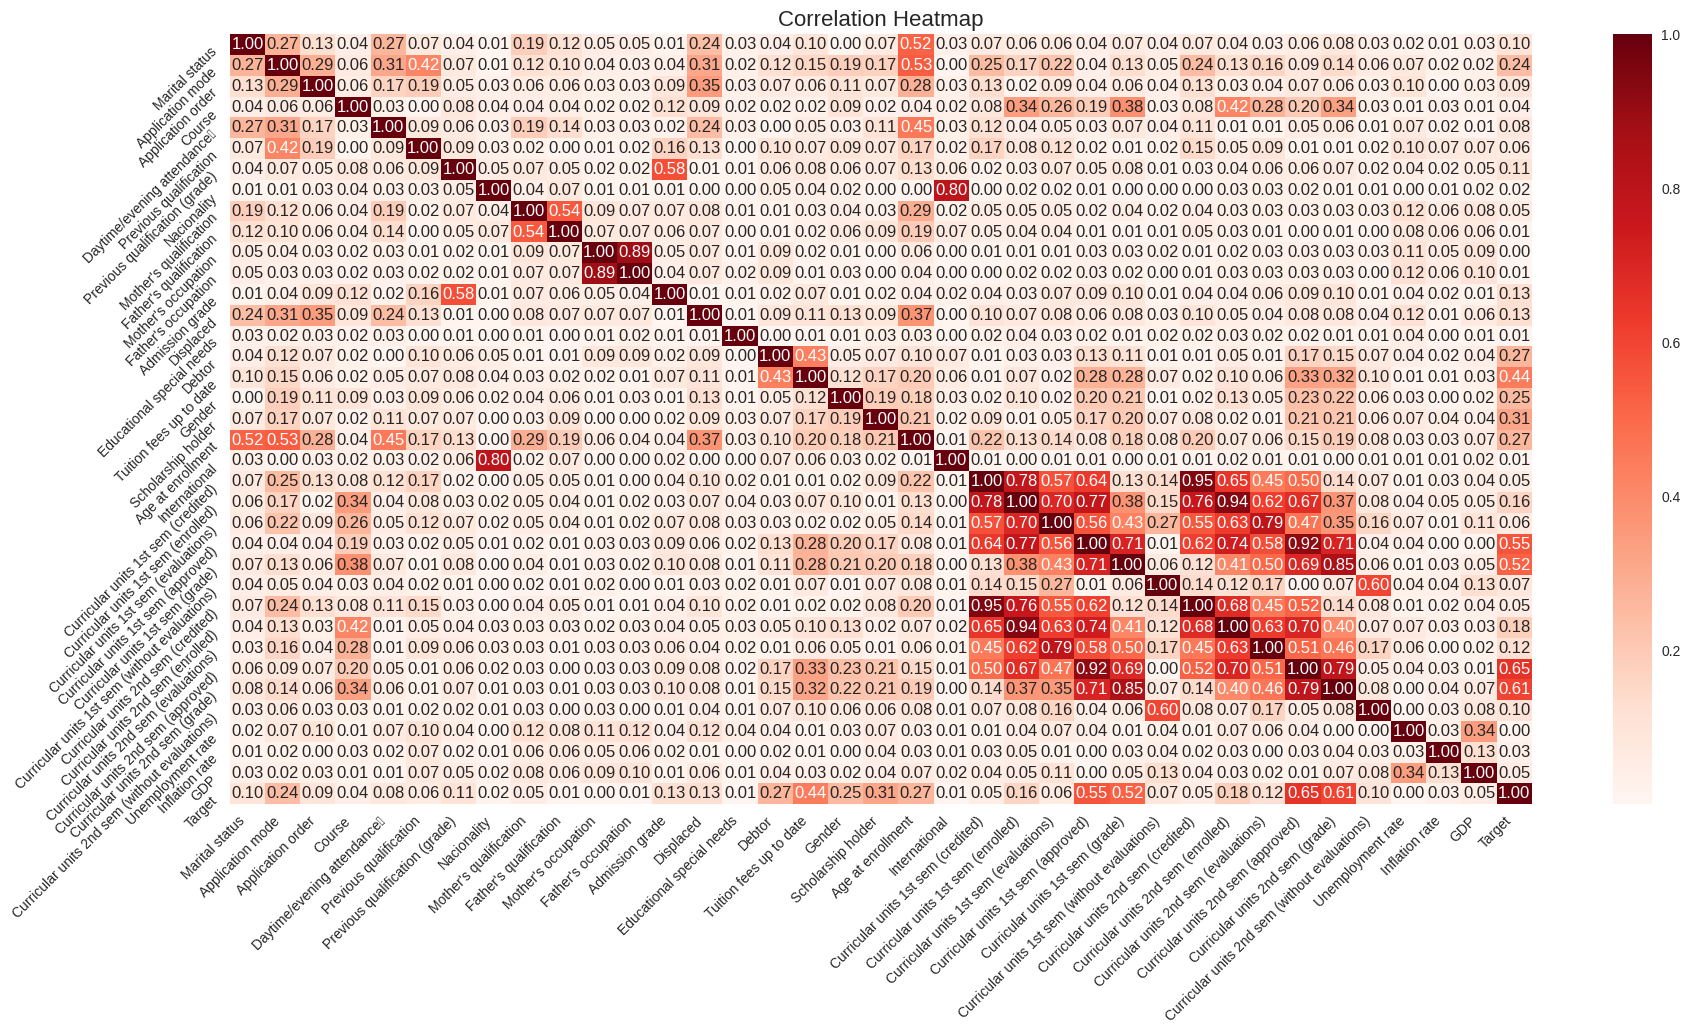

In [ ]:
# Make a copy of the dataframe
new_df = df.copy()

# Adjust the figure size for better readability
plt.figure(figsize=(21, 10))

# Calculate the correlation matrix
corr = new_df.corr()

# Create the heatmap
heatmap = sb.heatmap(abs(corr), annot=True, cmap="Reds", fmt=".2f")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels at 45 degrees and align to the right

# Rotate y-axis labels for better readability
plt.yticks(rotation=45, va='top')  # Rotate y-axis labels at 45 degrees and align to the top

# Add title
plt.title("Correlation Heatmap", fontsize=16)

# Display the heatmap
plt.show()

<ipython-input-17-84bcda638dae>:6: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()


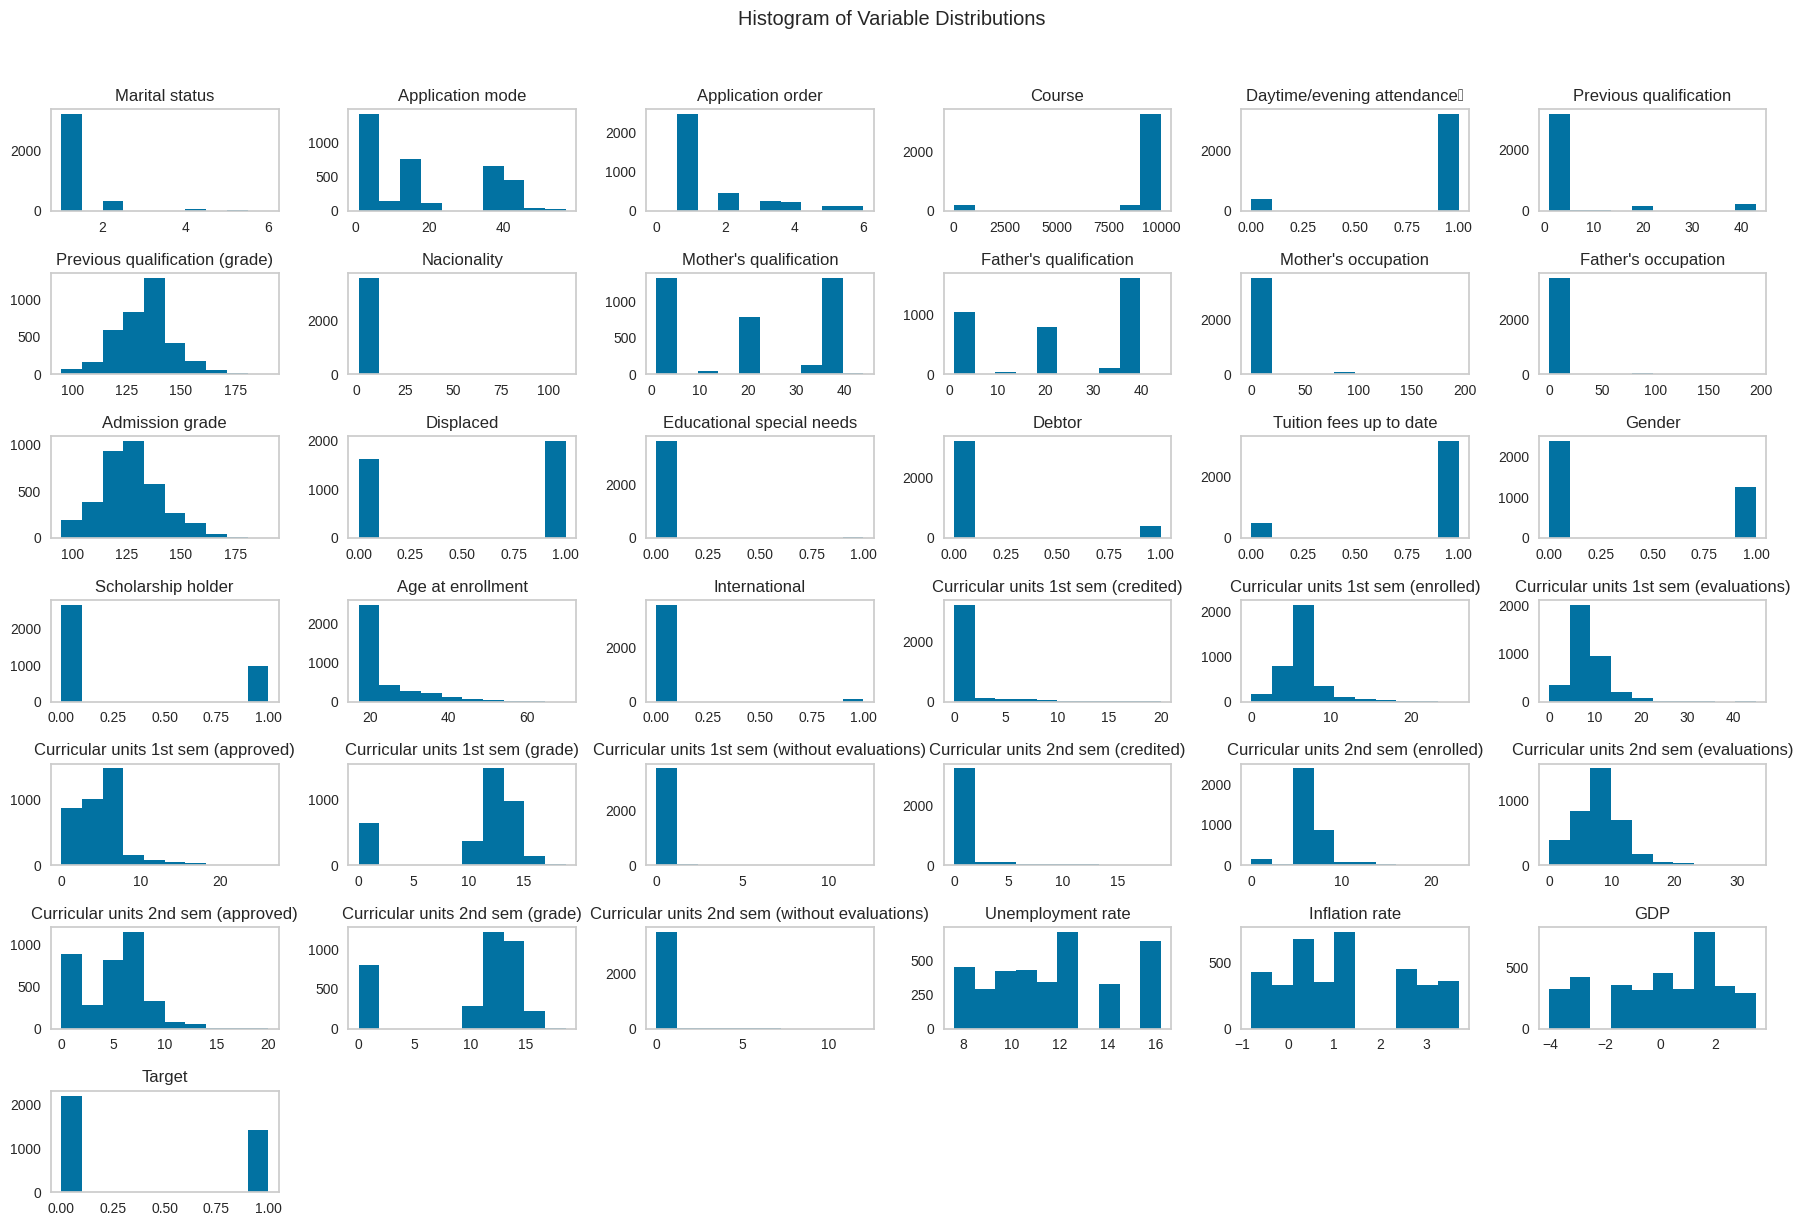

In [ ]:
# Plot histogram of distribution for all variables
new_df.hist(figsize=(18, 12), bins=10, grid=False)
plt.xticks(rotation=45)
# Set plot title and axis labels
plt.suptitle('Histogram of Variable Distributions', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# calculating the percentage of instances with and without heart disease
count_Graduate = len(df[df['Target']==0])
count_Dropout = len(df[df['Target']==1])
pct_of_Graduate = count_Graduate/(count_Graduate+count_Dropout)
print("percentage of Graduation", pct_of_Graduate*100)
pct_of_Dropout = count_Dropout/(count_Graduate+count_Dropout)
print("percentage of Dropout ", pct_of_Dropout*100)

percentage of Graduation 60.85399449035813
percentage of Dropout  39.146005509641874


<ipython-input-14-6106f40aa5cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Target', data=df, palette=colors)


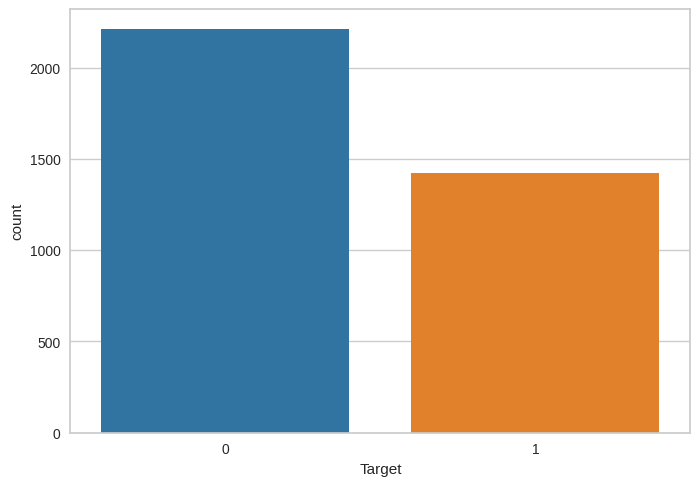

In [ ]:
colors = ['#1f77b4', '#ff7f0e']

sb.countplot(x='Target', data=df, palette=colors)

plt.show()

In [ ]:
count_Graduation = len(df[df['Target']==0])
count_Dropout = len(df[df['Target']==1])
pct_of_Graduation = count_Graduation/(count_Graduation+count_Dropout)
print("percentage of Graduated", pct_of_Graduation*100)
pct_of_Dropout = count_Dropout/(count_Graduation+count_Dropout)
print("percentage of Droped ", pct_of_Dropout*100)

percentage of Graduated 60.85399449035813
percentage of Droped  39.146005509641874


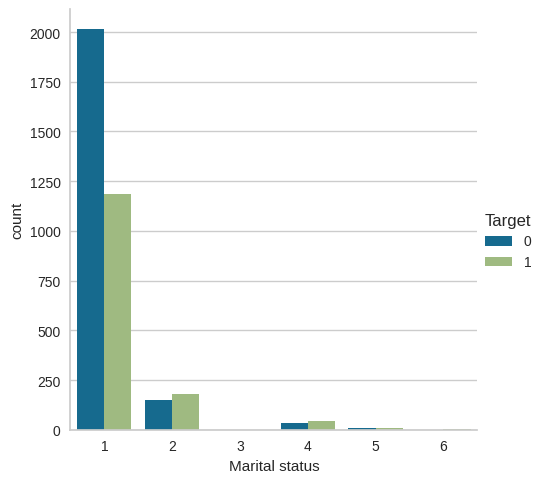

In [ ]:
sb.catplot(x='Marital status',hue='Target',data=df,kind="count")

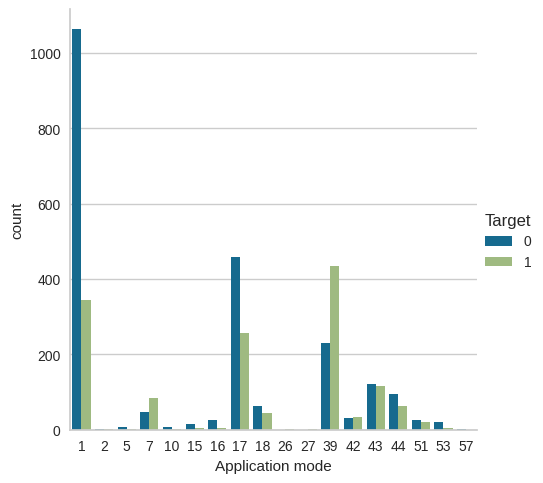

In [ ]:
sb.catplot(x='Application mode',hue='Target',data=df,kind="count")

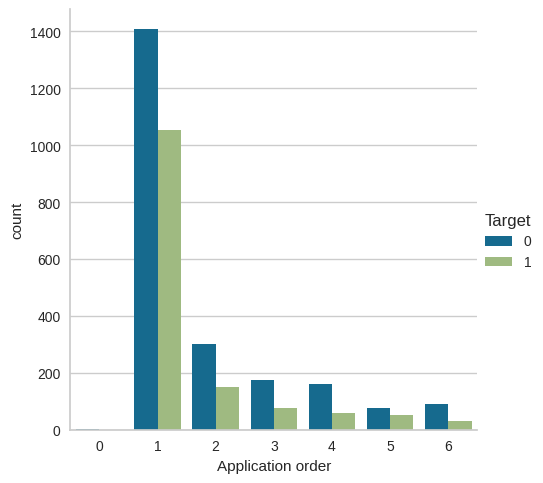

In [ ]:
sb.catplot(x='Application order',hue='Target',data=df,kind="count")

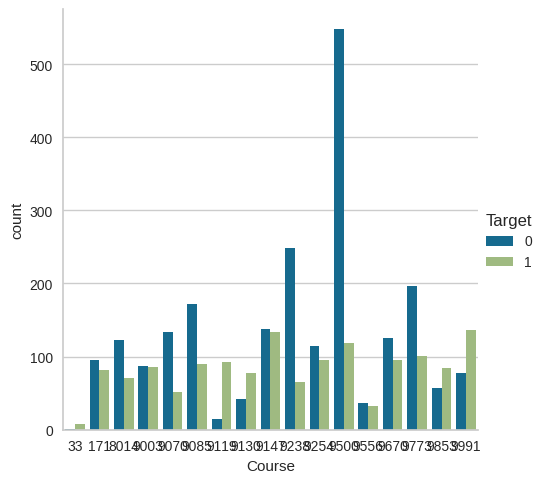

In [ ]:
sb.catplot(x='Course',hue='Target',data=df,kind="count")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


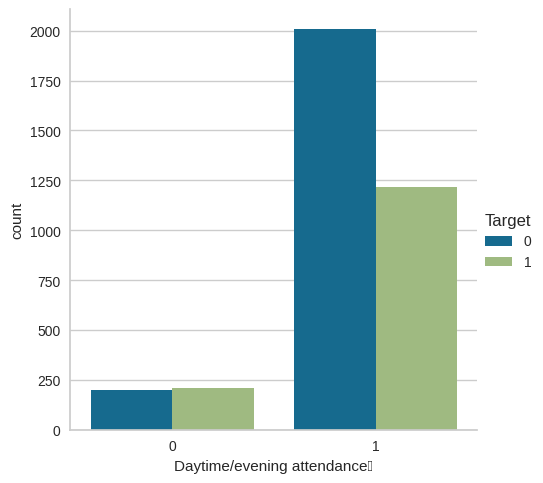

In [ ]:
sb.catplot(x='Daytime/evening attendance\t',hue='Target',data=df,kind="count")

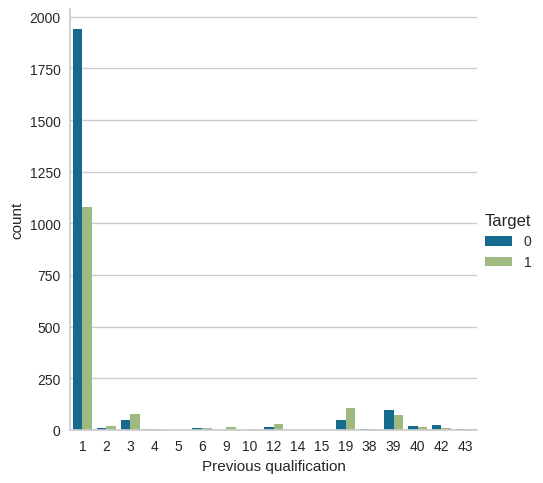

In [ ]:
sb.catplot(x='Previous qualification',hue='Target',data=df,kind="count")

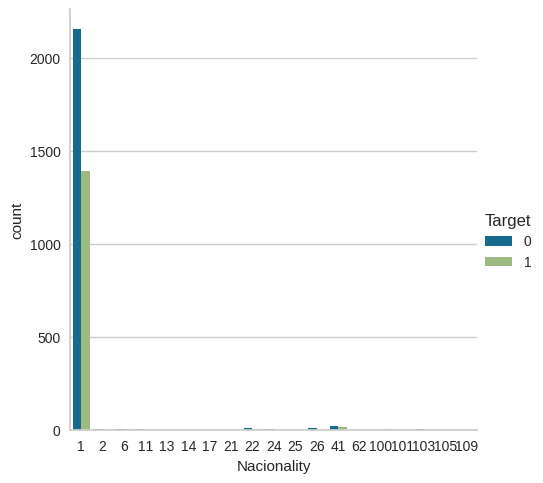

In [ ]:
sb.catplot(x='Nacionality',hue='Target',data=df,kind="count")

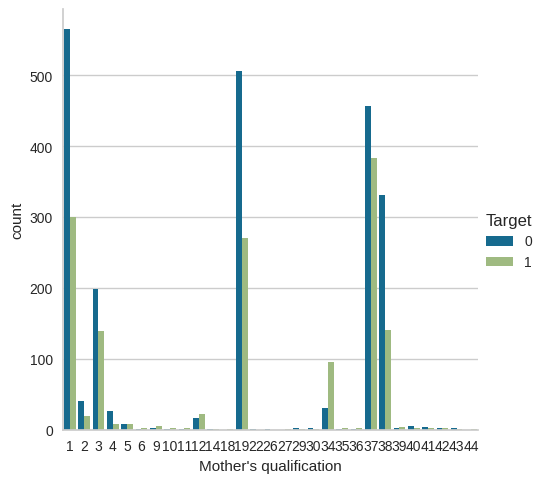

In [ ]:
sb.catplot(x="Mother's qualification",hue='Target',data=df,kind="count")

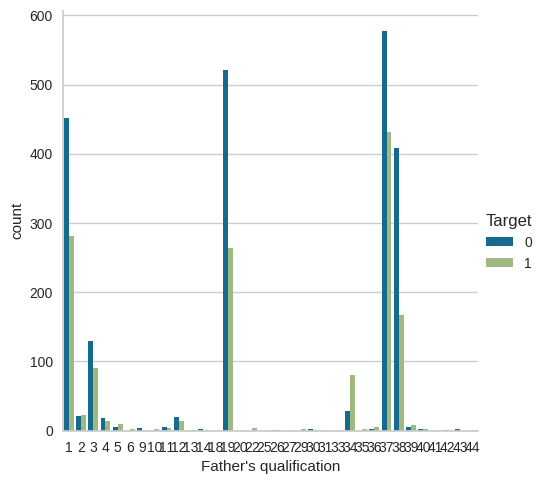

In [ ]:
sb.catplot(x="Father's qualification",hue='Target',data=df,kind="count")

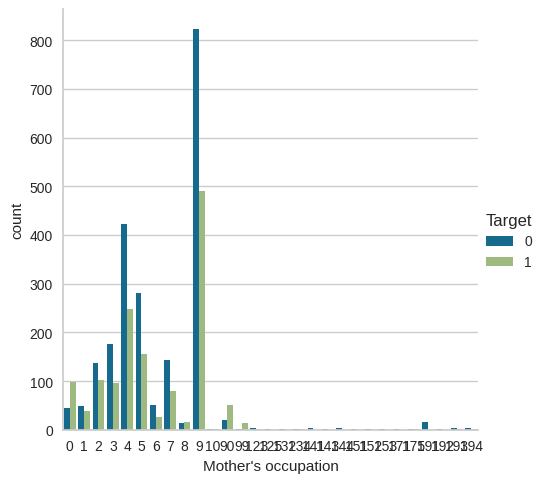

In [ ]:
sb.catplot(x="Mother's occupation",hue='Target',data=df,kind="count")

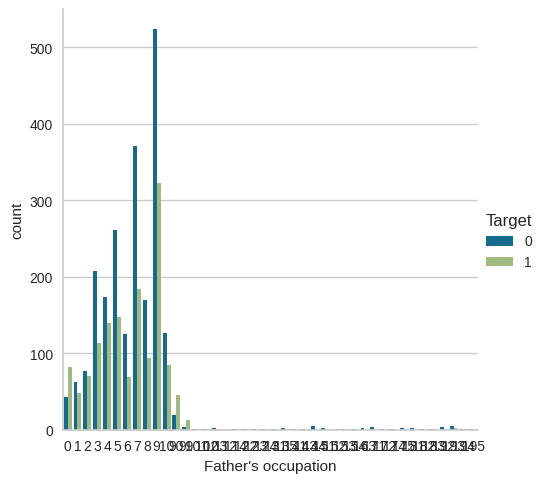

In [ ]:
sb.catplot(x="Father's occupation",hue='Target',data=df,kind="count")

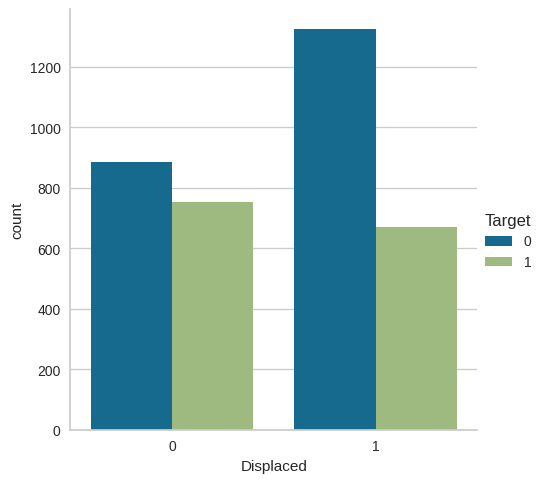

In [ ]:
sb.catplot(x='Displaced',hue='Target',data=df,kind="count")

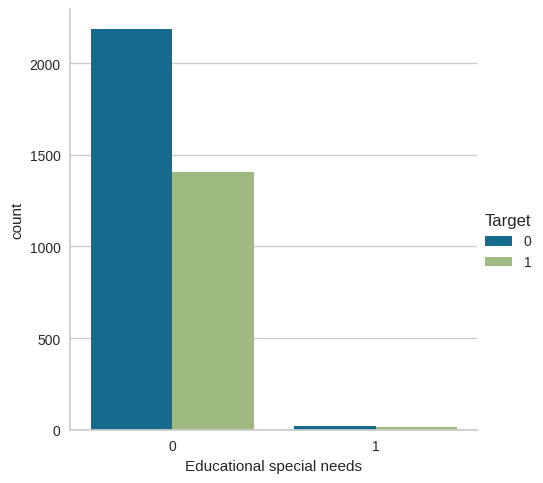

In [ ]:
sb.catplot(x='Educational special needs',hue='Target',data=df,kind="count")

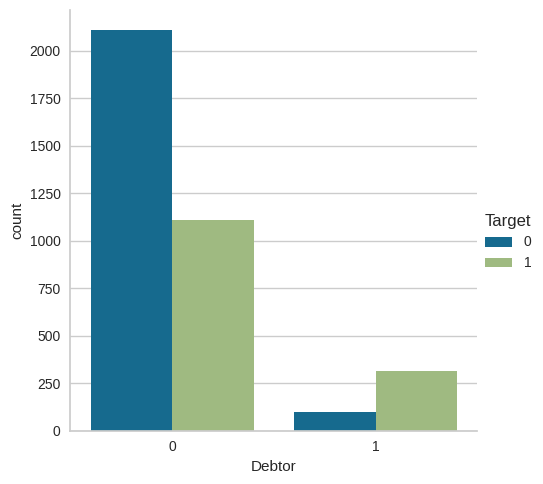

In [ ]:
sb.catplot(x='Debtor',hue='Target',data=df,kind="count")

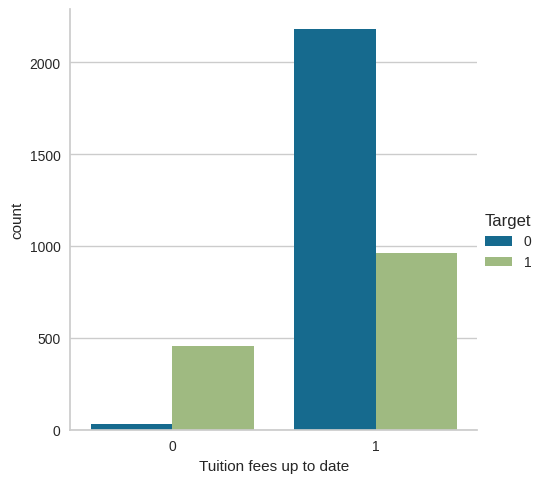

In [ ]:
sb.catplot(x='Tuition fees up to date',hue='Target',data=df,kind="count")

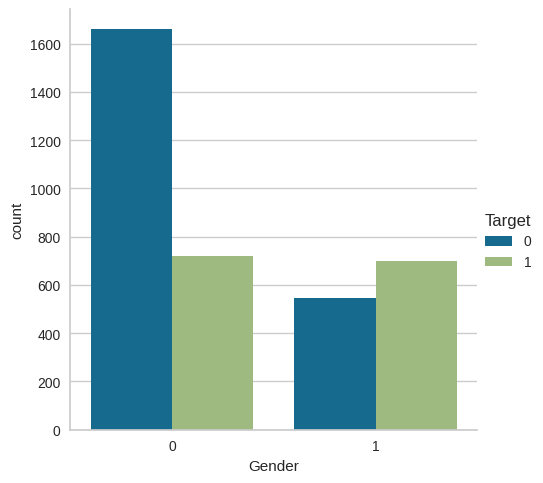

In [ ]:
sb.catplot(x='Gender',hue='Target',data=df,kind="count")

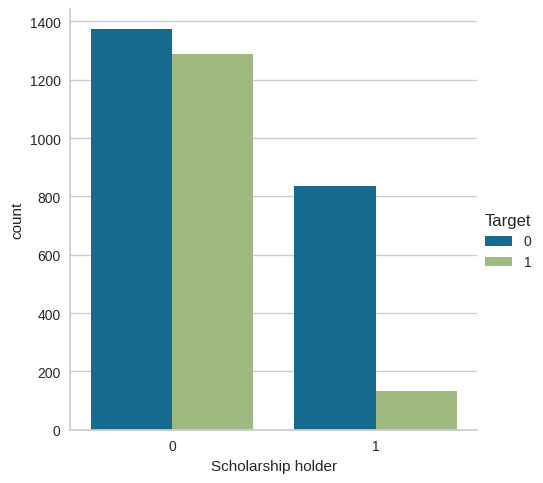

In [ ]:
sb.catplot(x='Scholarship holder',hue='Target',data=df,kind="count")

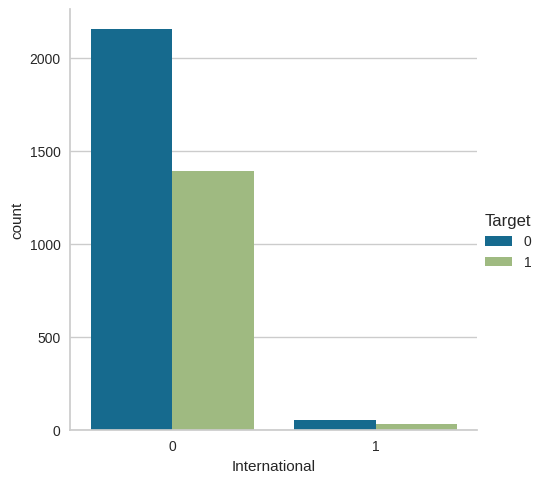

In [ ]:
sb.catplot(x='International',hue='Target',data=df,kind="count")

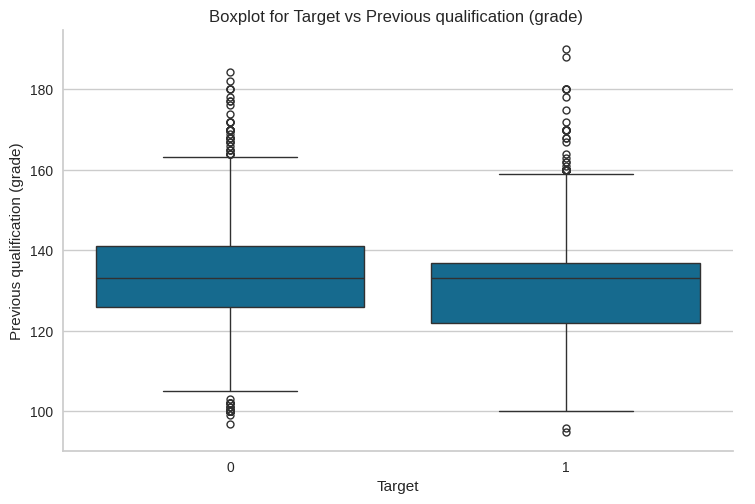

In [ ]:
sb.catplot(x="Target", y="Previous qualification (grade)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Previous qualification (grade) ")
plt.show()

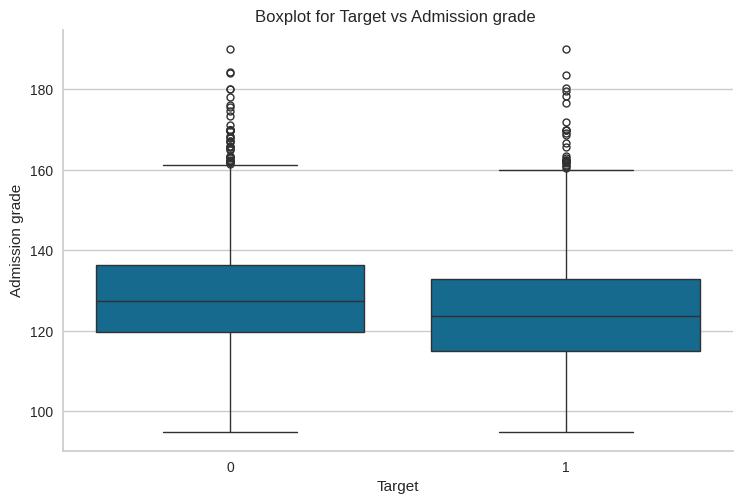

In [ ]:
sb.catplot(x="Target", y="Admission grade", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Admission grade ")
plt.show()

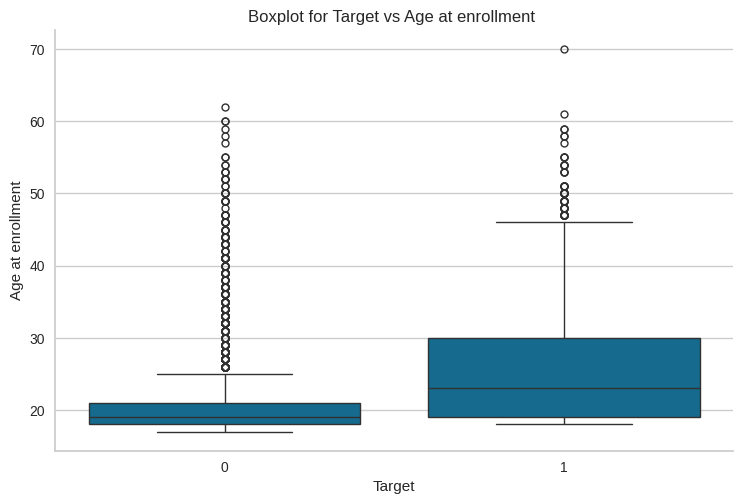

In [ ]:
sb.catplot(x="Target", y="Age at enrollment", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Age at enrollment ")
plt.show()

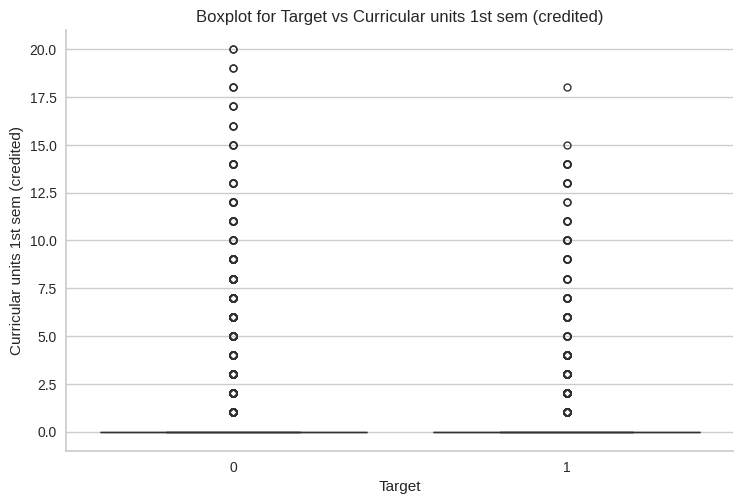

In [ ]:
sb.catplot(x="Target", y="Curricular units 1st sem (credited)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 1st sem (credited)")
plt.show()

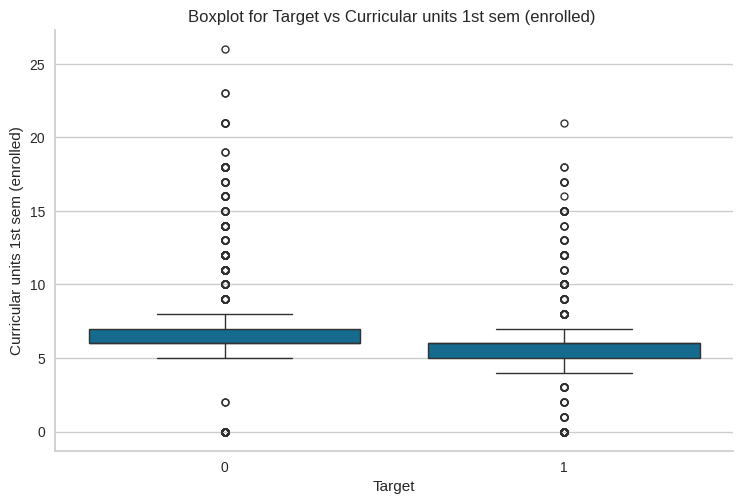

In [ ]:
sb.catplot(x="Target", y="Curricular units 1st sem (enrolled)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 1st sem (enrolled) ")
plt.show()

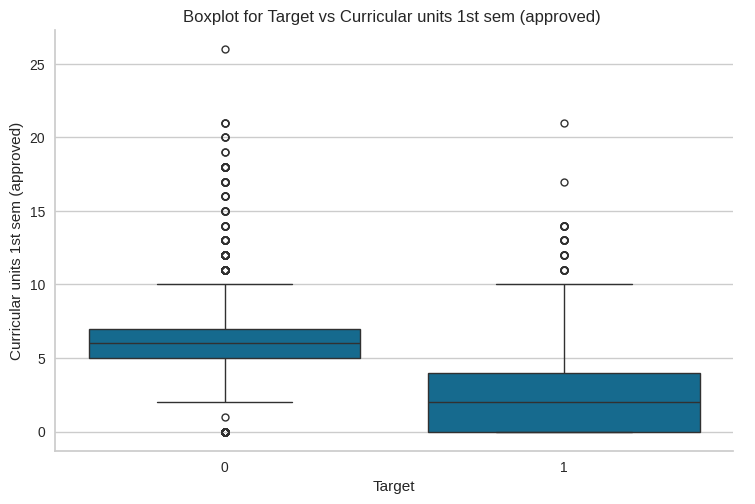

In [ ]:
sb.catplot(x="Target", y="Curricular units 1st sem (approved)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 1st sem (approved) ")
plt.show()

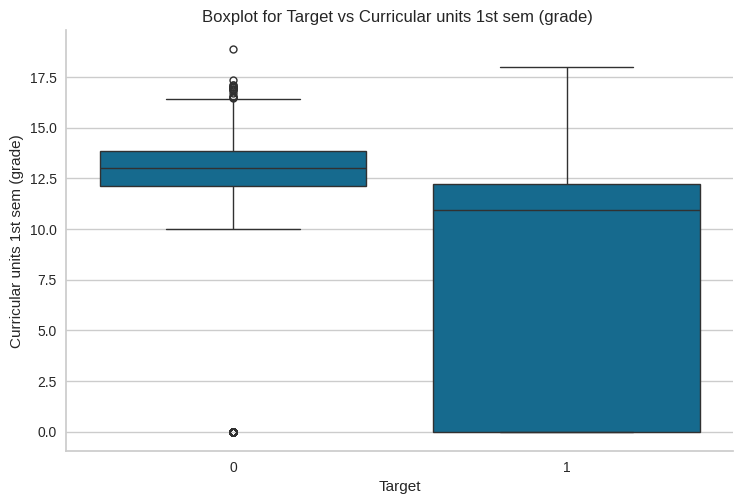

In [ ]:
sb.catplot(x="Target", y="Curricular units 1st sem (grade)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 1st sem (grade) ")
plt.show()

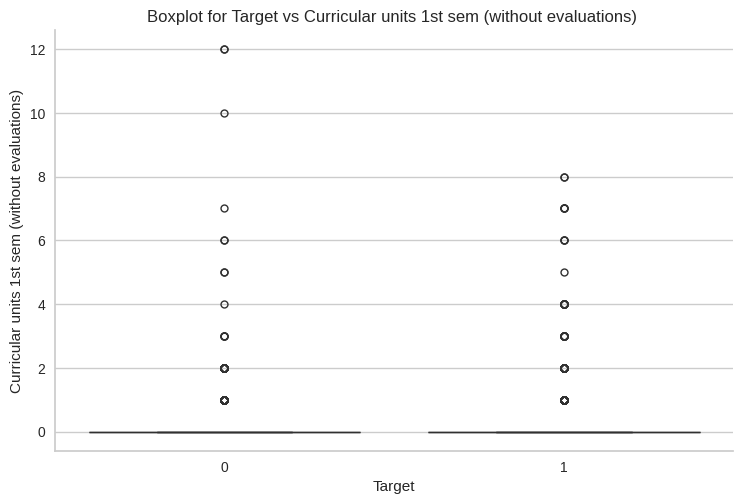

In [ ]:
sb.catplot(x="Target", y="Curricular units 1st sem (without evaluations)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 1st sem (without evaluations) ")
plt.show()

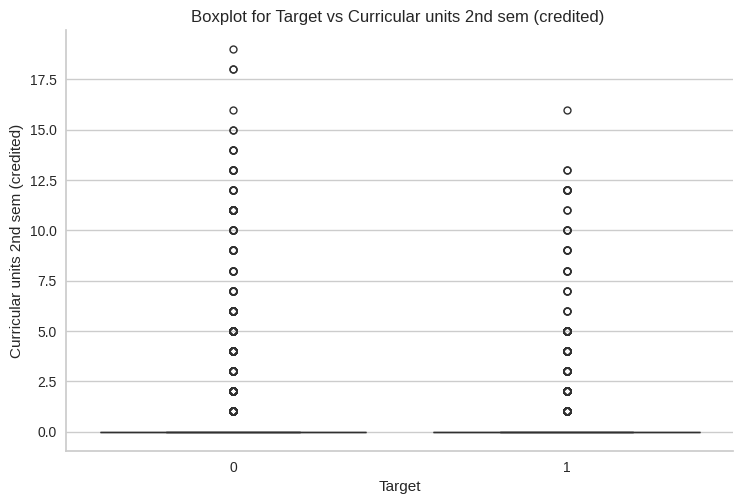

In [ ]:
sb.catplot(x="Target", y="Curricular units 2nd sem (credited)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 2nd sem (credited) ")
plt.show()

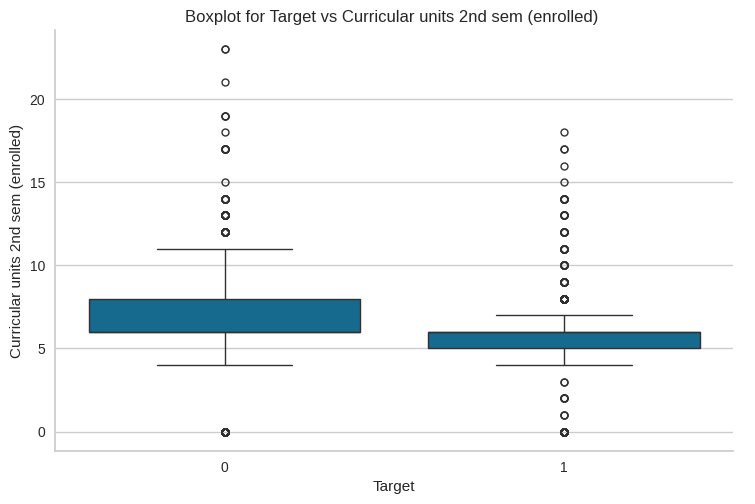

In [ ]:
sb.catplot(x="Target", y="Curricular units 2nd sem (enrolled)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 2nd sem (enrolled) ")
plt.show()

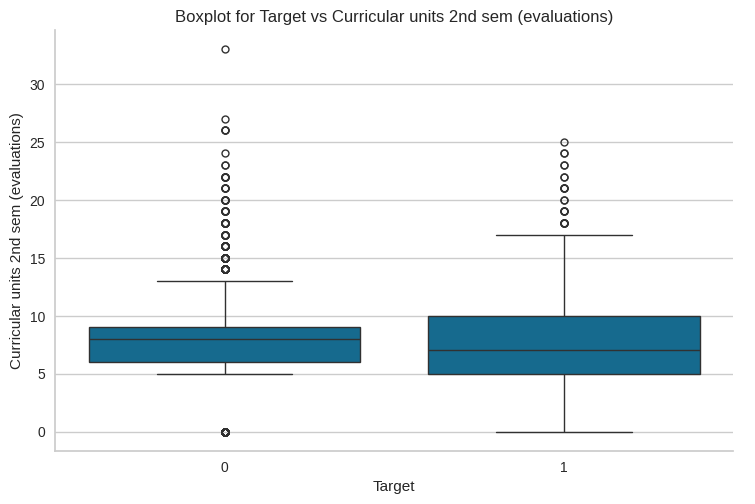

In [ ]:
sb.catplot(x="Target", y="Curricular units 2nd sem (evaluations)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 2nd sem (evaluations)")
plt.show()

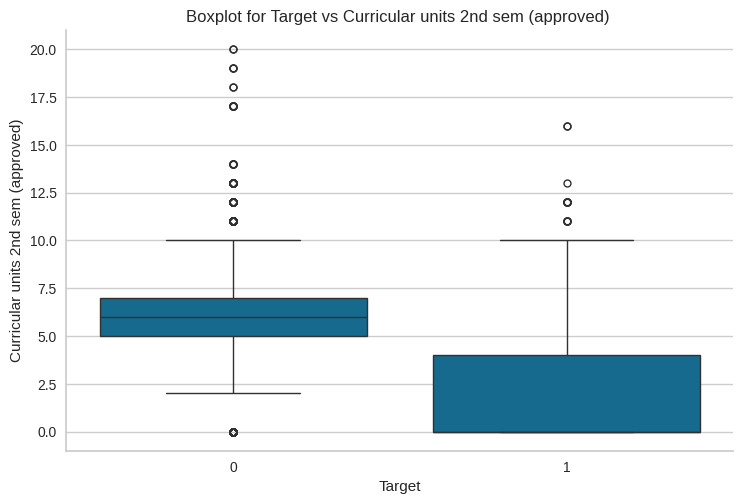

In [ ]:
sb.catplot(x="Target", y="Curricular units 2nd sem (approved)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 2nd sem (approved) ")
plt.show()

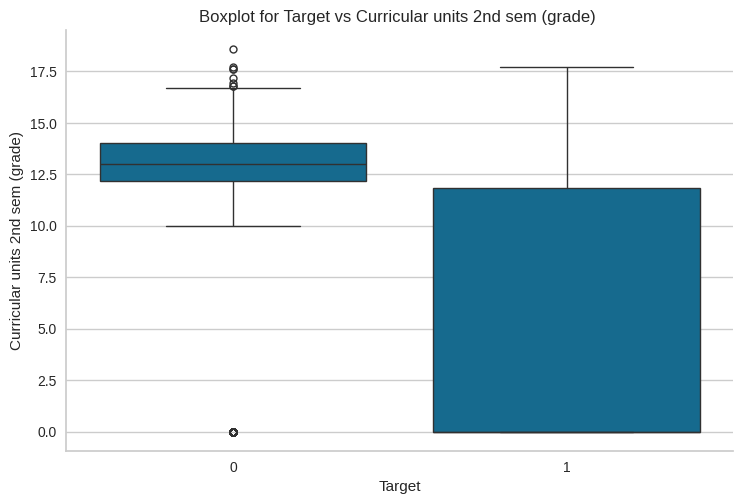

In [ ]:
sb.catplot(x="Target", y="Curricular units 2nd sem (grade)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 2nd sem (grade) ")
plt.show()

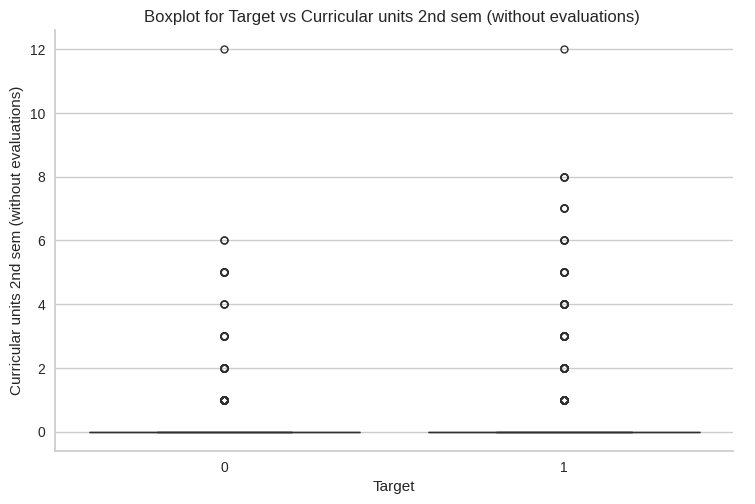

In [ ]:
sb.catplot(x="Target", y="Curricular units 2nd sem (without evaluations)", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Curricular units 2nd sem (without evaluations) ")
plt.show()

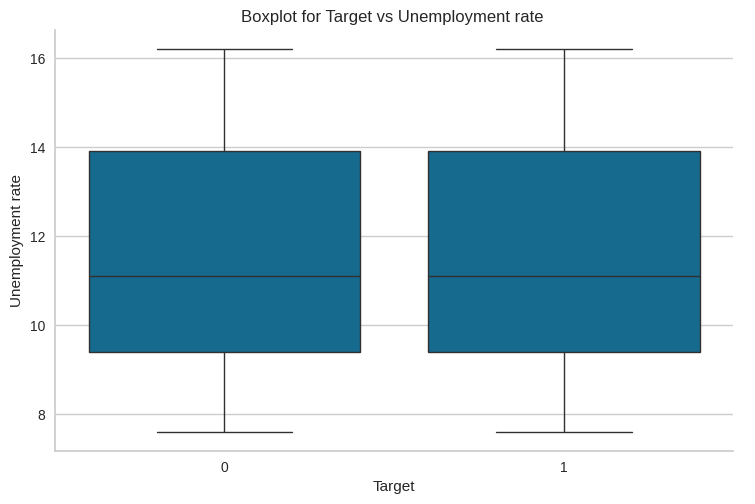

In [ ]:
sb.catplot(x="Target", y="Unemployment rate", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Unemployment rate ")
plt.show()

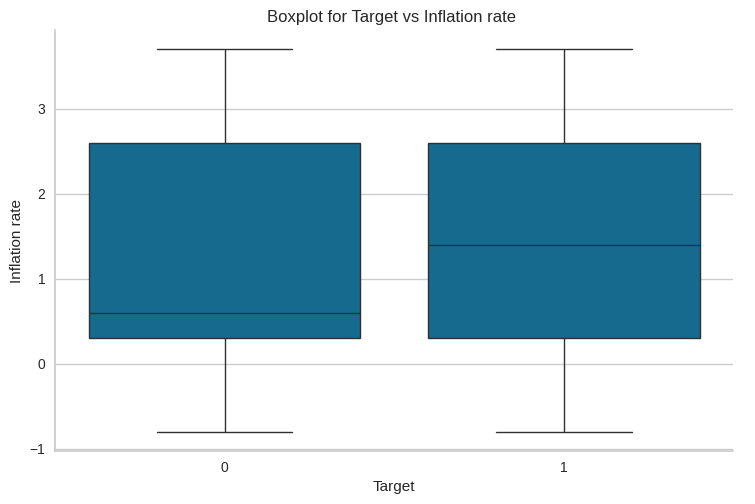

In [ ]:
sb.catplot(x="Target", y="Inflation rate", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs Inflation rate ")
plt.show()

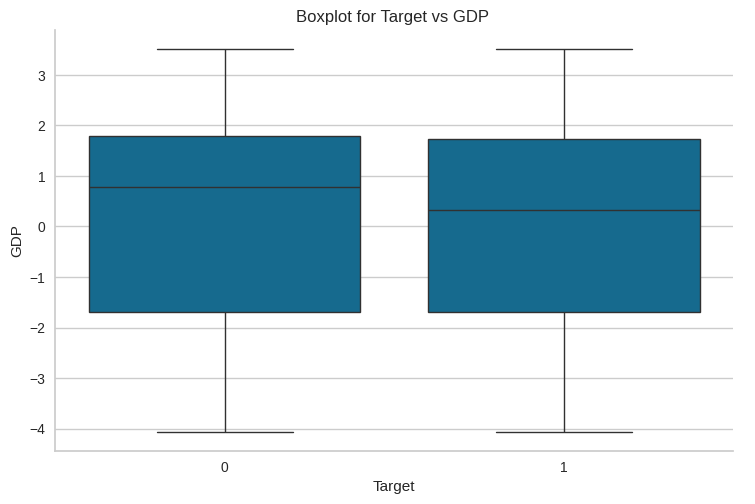

In [ ]:
sb.catplot(x="Target", y="GDP", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Target vs GDP ")
plt.show()

In [ ]:
#Remove Outliers using IQR (Interquartile Range)
def remove_outliers_iqr(df, columns, threshold=1.5):
    for column in columns:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to detect outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove outliers in-place from the DataFrame
        df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

columns_to_remove_outliers = ["Curricular units 2nd sem (without evaluations)", "Curricular units 2nd sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (credited)","Curricular units 1st sem (without evaluations)","Curricular units 1st sem (grade)","Curricular units 1st sem (approved)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (credited)","Age at enrollment","Admission grade","Previous qualification (grade)" ]
remove_outliers_iqr(df, columns_to_remove_outliers, threshold=1.5)

In [ ]:
df.shape

(1437, 37)

In [ ]:
X= df.drop(['Target'],axis=1)
y=df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Handling imbalanced target variable with SMOTE oversampling
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

# Apply SMOTE for oversampling the minority class to the training data only
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# Convert the oversampled arrays back to DataFrames
os_data_X = pd.DataFrame(data=os_data_X, columns=X.columns)
os_data_y = pd.Series(os_data_y, name='Target')

# We can check the numbers of our data
print("length of oversampled data is ", len(os_data_X))
print("Number of graduated  in oversampled data", len(os_data_y[os_data_y == 0]))
print("Number of dropout", len(os_data_y[os_data_y == 1]))
print("Proportion of graduated data in oversampled data is ", len(os_data_y[os_data_y == 0]) / len(os_data_X))
print("Proportion of dropoutdata in oversampled data is ", len(os_data_y[os_data_y == 1]) / len(os_data_X))

length of oversampled data is  1790
Number of graduated  in oversampled data 0
Number of dropout 0
Proportion of graduated data in oversampled data is  0.0
Proportion of dropoutdata in oversampled data is  0.0


In [ ]:
# Dictionary of classifiers
classifiers = {
    'DT': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(n_neighbors=10),
    'GNB': GaussianNB(),
    'RFC': RandomForestClassifier(n_estimators=100),
    'LR': LogisticRegression(random_state=0, max_iter=100, solver='lbfgs', multi_class='auto'),
    'Linear SVM': svm.SVC(kernel='linear', C=1, decision_function_shape='ovo'),
    'RBF SVM': svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo'),
    'Poly SVM': svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo'),
    'Sigmoid SVM': svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
}

# Loop through each classifier, fit, cross-validate, and print classification reports
for model, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    kf = KFold(n_splits=5)
    scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=kf)
    print(f'{model} CV Accuracy: {round(scores.mean() * 100, 2)}% (+/- {round(scores.std() * 100, 2)}%)')

    y_pred = classifier.predict(X_test)
    print(f'Classification Report for {model}')
    print(classification_report(y_test, y_pred))
    print()

DT CV Accuracy: 87.76% (+/- 0.4%)
Classification Report for DT
              precision    recall  f1-score   support

     Dropout       0.32      0.36      0.34        53
    Graduate       0.91      0.89      0.90       379

    accuracy                           0.83       432
   macro avg       0.61      0.63      0.62       432
weighted avg       0.84      0.83      0.83       432


knn CV Accuracy: 90.55% (+/- 1.78%)
Classification Report for knn
              precision    recall  f1-score   support

     Dropout       0.79      0.21      0.33        53
    Graduate       0.90      0.99      0.94       379

    accuracy                           0.90       432
   macro avg       0.84      0.60      0.64       432
weighted avg       0.89      0.90      0.87       432


GNB CV Accuracy: 20.3% (+/- 4.38%)
Classification Report for GNB
              precision    recall  f1-score   support

     Dropout       0.13      0.91      0.22        53
    Graduate       0.91      0.13      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Poly SVM CV Accuracy: 91.84% (+/- 1.56%)
Classification Report for Poly SVM
              precision    recall  f1-score   support

     Dropout       0.75      0.17      0.28        53
    Graduate       0.90      0.99      0.94       379

    accuracy                           0.89       432
   macro avg       0.82      0.58      0.61       432
weighted avg       0.88      0.89      0.86       432


Sigmoid SVM CV Accuracy: 89.15% (+/- 1.42%)
Classification Report for Sigmoid SVM
              precision    recall  f1-score   support

     Dropout       0.42      0.09      0.15        53
    Graduate       0.89      0.98      0.93       379

    accuracy                           0.87       432
   macro avg       0.65      0.54      0.54       432
weighted avg       0.83      0.87      0.84       432




In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
k = 5
kf = KFold(n_splits=k)
result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8666666666666666


In [ ]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt, target_names = ['Graduate', 'Dropout']))

              precision    recall  f1-score   support

    Graduate       0.90      0.91      0.91       379
     Dropout       0.31      0.28      0.29        53

    accuracy                           0.83       432
   macro avg       0.60      0.60      0.60       432
weighted avg       0.83      0.83      0.83       432



In [ ]:
dt.feature_importances_

array([0.        , 0.00041262, 0.0293334 , 0.0427682 , 0.        ,
       0.        , 0.05060706, 0.        , 0.0104209 , 0.01361097,
       0.01744068, 0.03528211, 0.07823982, 0.00765617, 0.        ,
       0.        , 0.08050112, 0.0308211 , 0.01855881, 0.00765617,
       0.        , 0.        , 0.        , 0.07425375, 0.01493491,
       0.11904108, 0.        , 0.        , 0.        , 0.0369096 ,
       0.17418067, 0.08726616, 0.        , 0.00107573, 0.00911831,
       0.05991066])

In [ ]:
feature_names = X.columns

In [ ]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names).sort_values(0,ascending=False)

In [ ]:
# Calculating feature importance to identify key drivers for the target variable.
feature_importance

,0
Curricular units 2nd sem (approved),0.174181
Curricular units 1st sem (grade),0.119041
Curricular units 2nd sem (grade),0.087266
Tuition fees up to date,0.080501
Admission grade,0.078240
Curricular units 1st sem (evaluations),0.074254
GDP,0.059911
Previous qualification (grade),0.050607
Course,0.042768
Curricular units 2nd sem (evaluations),0.036910


In [ ]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

In [ ]:
result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9084577114427861


In [ ]:
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       379
           1       0.87      0.25      0.38        53

    accuracy                           0.90       432
   macro avg       0.89      0.62      0.66       432
weighted avg       0.90      0.90      0.88       432



In [ ]:
rf.feature_importances_

array([0.        , 0.01981947, 0.02282559, 0.05419083, 0.00139956,
       0.0013196 , 0.04907213, 0.00374171, 0.03381156, 0.02913018,
       0.02016462, 0.03006278, 0.05012363, 0.01280434, 0.        ,
       0.02478544, 0.06044274, 0.02012723, 0.01289664, 0.02317181,
       0.00066471, 0.        , 0.0120041 , 0.03517576, 0.05082241,
       0.05554057, 0.        , 0.        , 0.01246351, 0.05398416,
       0.10504543, 0.10636946, 0.        , 0.02284968, 0.0354881 ,
       0.03970227])

In [ ]:
feature_names = X.columns

In [ ]:
# Calculating feature importance to identify key drivers for the target variable.
feature_importance

,0
Curricular units 2nd sem (approved),0.174181
Curricular units 1st sem (grade),0.119041
Curricular units 2nd sem (grade),0.087266
Tuition fees up to date,0.080501
Admission grade,0.078240
Curricular units 1st sem (evaluations),0.074254
GDP,0.059911
Previous qualification (grade),0.050607
Course,0.042768
Curricular units 2nd sem (evaluations),0.036910


In [ ]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
# Dictionary of classifiers
#classifiers = {
    #'DT': DecisionTreeClassifier(),
    #'knn': KNeighborsClassifier(n_neighbors=10),
    #'GNB': GaussianNB(),
    #'RFC': RandomForestClassifier(n_estimators=100),
    #'LR': LogisticRegression(random_state=0, max_iter=100, solver='lbfgs', multi_class='auto'),
    # Exclude 'Linear SVM' and 'RBF SVM' due to warnings and potential performance issues
    #'Linear SVM': svm.SVC(kernel='linear', C=1, decision_function_shape='ovo'),
   # 'RBF SVM': svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo'),
    #'Poly SVM': svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo'),
    #'Sigmoid SVM': svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
#}

# Loop through each classifier, fit, cross-validate, and print classification reports
#for model, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)

    #kf = KFold(n_splits=5)
    #scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=kf)
    #print(f'{model} CV Accuracy: {round(scores.mean() * 100, 2)}% (+/- {round(scores.std() * 100, 2)}%)')

    #y_pred = classifier.predict(X_test)
    #print(f'Classification Report for {model}')
    #print(classification_report(y_test, y_pred))
    #print()

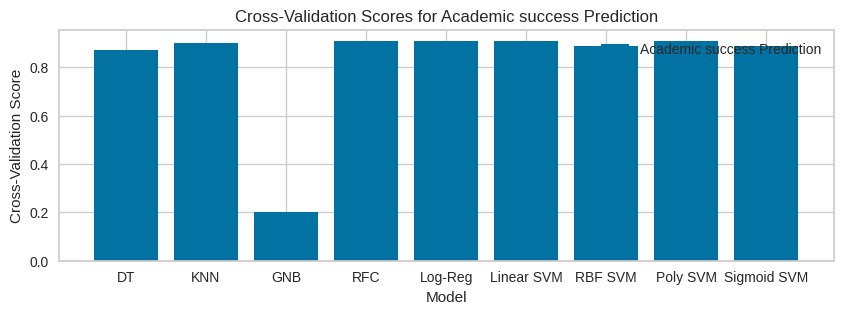

In [ ]:
# Visualization of Cross-Validation Scores for Ten Year CHD Prediction
# Models
X = ['DT', 'KNN', 'GNB', 'RFC', 'Log-Reg','Linear SVM','RBF SVM','Poly SVM', 'Sigmoid SVM']

# Cross-validation scores for Ten Year CHD prediction
cv_scores = [0.87, 0.90, 0.20, 0.91, 0.91, 0.91, 0.89,0.91,0.89]

# Number of bars
n_bars = len(X)

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (10, 3)

# Plotting the bars for Ten Year CHD prediction using the model names and respective data
plt.bar(X, cv_scores, label='Academic success Prediction')

# Setting the range of values for the X axis and labels
plt.xlabel("Model")
plt.ylabel("Cross-Validation Score")
plt.title("Cross-Validation Scores for Academic success Prediction")
plt.legend(loc='upper right')

plt.show()

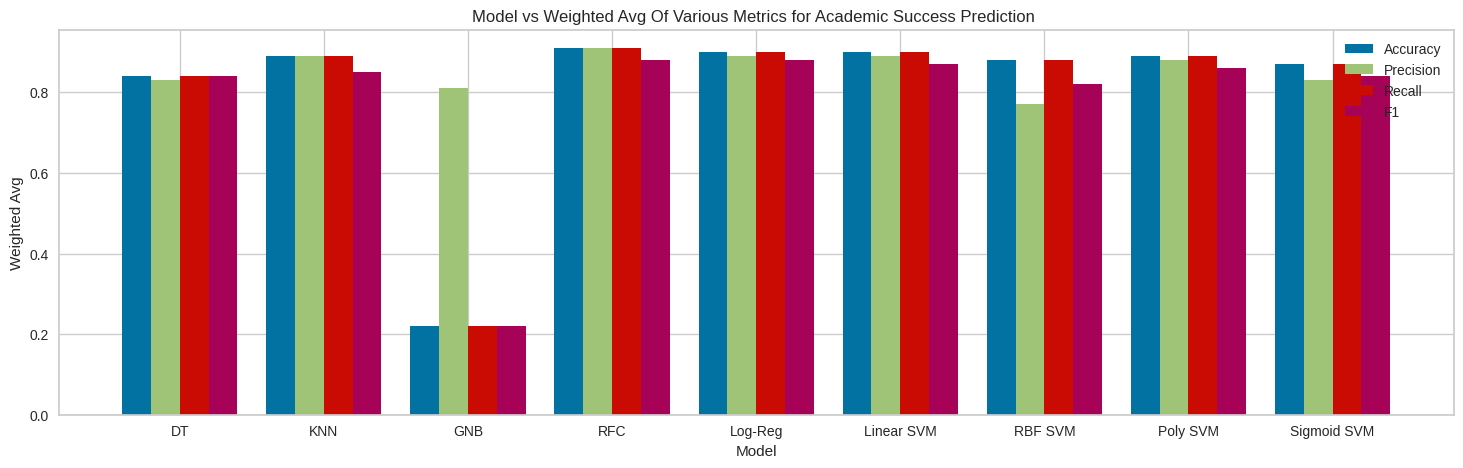

In [ ]:
# Visualization of Weighted Average Performance Metrics for Different ML Models
#Models
X = ['DT', 'KNN', 'GNB', 'RFC', 'Log-Reg','Linear SVM','RBF SVM','Poly SVM', 'Sigmoid SVM']

# Collect this information from the classification reports and store them in lists
accuracy = [0.84, 0.89, 0.22, 0.91, 0.90, 0.90, 0.88,0.89,0.87]
precision = [0.83, 0.89, 0.81, 0.91, 0.89, 0.89, 0.77,0.88,0.83]
recall = [0.84, 0.89, 0.22, 0.91, 0.90, 0.90, 0.88,0.89,0.87]
f1 = [0.84, 0.85, 0.22, 0.88, 0.88, 0.87, 0.82,0.86,0.84]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (18, 5)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics for Academic Success Prediction ")
plt.legend(loc='upper right')

plt.show()

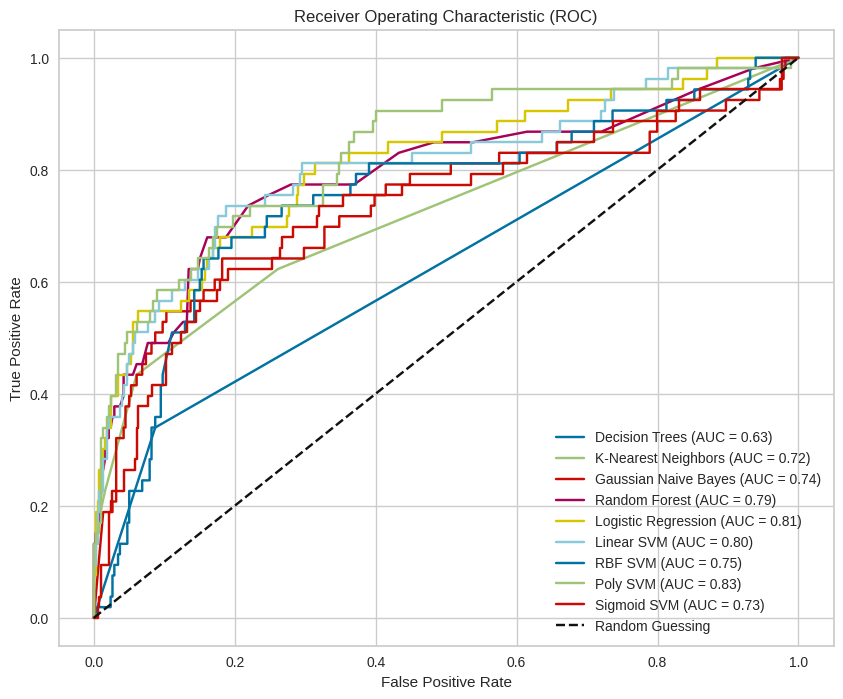

In [ ]:
# Create synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Initialize classifiers
classifiers = {
    "Decision Trees": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Linear SVM": svm.SVC(kernel='linear', C=1, probability=True, decision_function_shape='ovo'),
    "RBF SVM": svm.SVC(kernel='rbf', gamma=1, C=1, probability=True, decision_function_shape='ovo'),
    "Poly SVM": svm.SVC(kernel='poly', degree=3, C=1, probability=True, decision_function_shape='ovo'),
    "Sigmoid SVM": svm.SVC(kernel='sigmoid', C=1, probability=True, decision_function_shape='ovo')
}

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Iterate through classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
X = df[['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP',]].values # feature matrix
y = df['Target'].values # class matrix

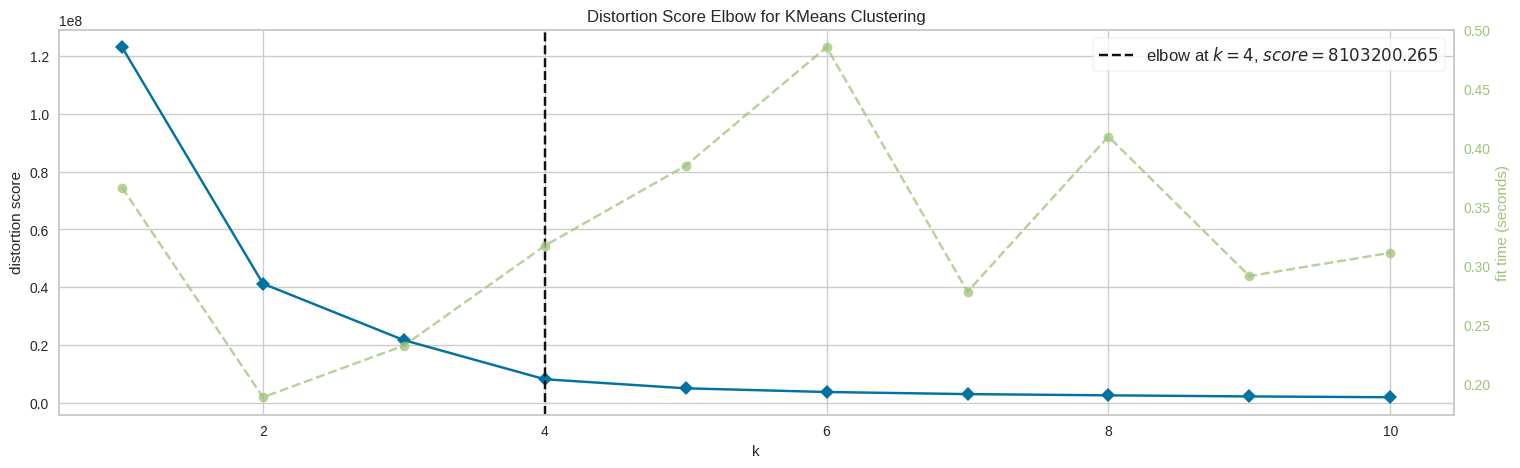

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [ ]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=4, random_state=10)

# call fit method with data
km = km_model.fit_predict(X)

# coordinates of cluster center
centroids = km_model.cluster_centers_

# cluster label for each data point
labels = km_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


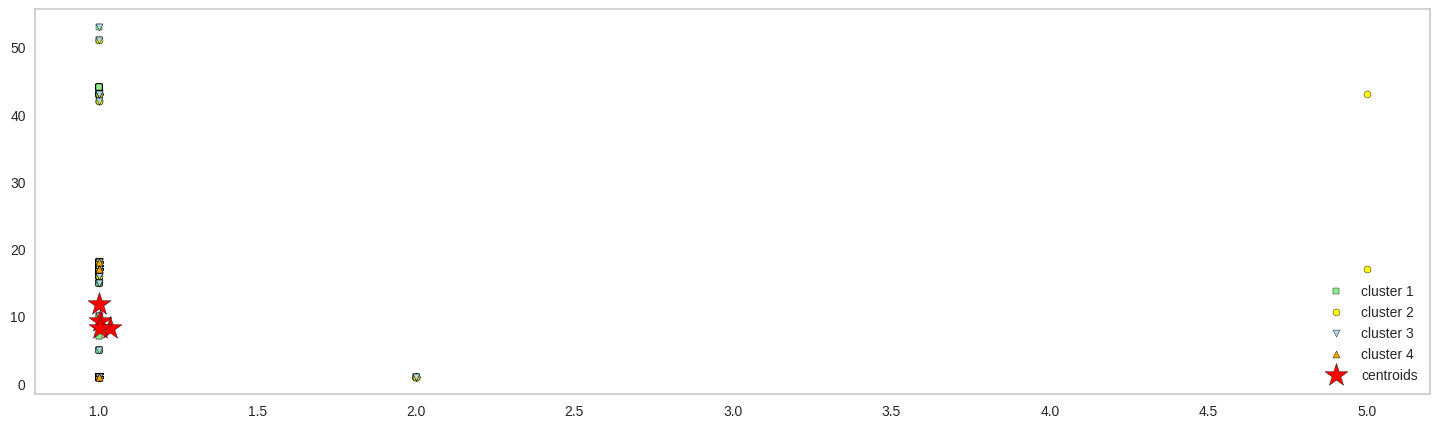

In [ ]:
# Visualize four clusters
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[km == 3, 0], X[km == 3, 1],
    s=25, c='orange',
    marker='^', edgecolor='black',
    label='cluster 4'
)

# Visualize centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 88.66%


In [ ]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3,
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 88.66%
The purity score for squared euclidean distance is 88.66%
The purity score for manhattan distance is 88.66%
The purity score for chebyshev distance is 88.66%
The purity score for canberra distance is 88.66%
The purity score for chi-square distance is 88.66%
